#5.텍스트 데이터 분석

## 5.1 텍스트 전처리

### 5.1.1 토큰화 (Tokenization)
주어진 코퍼스 내에서 분석 대상이 되는 유의한 단위인 토큰으로 나누는 작업 <br>
아래 예시에서 토큰은 단어
<br>

ex)
I like apple <br>
-> token: I, like, apple

<br>

주의사항: 단순히 특수문자 등을 제외하고 공백 기준으로 잘라내는 작업이라고는 할 수 없음 <br>
> ex) 
- 36.5, Ph.D, AT&T <br>
- 줄임말
- 야민정음
- 기타



### 5.1.2 정제 (Cleaning)
가지고 있는 단어 집합에서 불필요한 데이터를 제거하는 것 <br>
토큰화 작업 전후로 적용 <br>

> example
- 등장 빈도가 적은 단어
- 길이가 짧은 단어

### 5.1.3 정규화 (Normalization)
표현방법이 다른 단어를 하나의 단어로 통합

> example
- 대소문자 (covid == COVID)
- 동의어 (covid == 코로나)

#### 표제어 추출 (Lemmatization)
단어의 어근을 찾아 추출

> example
- am, are, is -> be
- apples -> apple


### 5.1.4 불용어 (Stopword)

가지고 있는 데이터 중 불필요한 토큰을 제거하는 작업 <br>
자주 등장하지만 분석에 큰 도움이 되지 않는 단어를 의미 <br>

> example <br>
- and, am, I, about 

<br>

```python
# 영문 불용어
from nltk.corpus import stopwords

stop_words_list = stopwords.words('english')
[word for word in word_tokens if word not in stop_words]

# 한국어 불용어
# https://www.ranks.nl/stopwords/korean
```

## 5.2 텍스트 데이터 분석

### 5.2.1 WordCloud
데이터의 태그들을 분석하여 중요도나 인기도 등을 고려하여 시각적으로 표시하는 것 <br>
주로 단어의 빈도를 이용하며, 중요도에 따라 글자의 색상이나 굵기 등 형태를 변화시킬 수 있음
<br>

```python
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

counter = Counter(word_list)

word_cloud = WordCloud(
    # font_path = "malgun" # 한글 입력 시 반드시 지정해야 함
    background_color="black", 
    max_font_size=60,
    colormap='prism'
    ).generate_from_frequencies(counter)

plt.figure(figsize=(10, 8))
plt.imshow(word_cloud)
plt.axis('off')
```
<br>

아래의 방법을 통해 특정 이미지 모양으로 시각화 가능
```python
import numpy as np
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
from PIL import Image

image = Image.open('./data/heart.png')
mask = np.array(image)

counter = Counter(word_list)

word_cloud = WordCloud(
    background_color="black", 
    max_font_size=60,
    colormap='prism',
    mask=mask,
    ).generate_from_frequencies(counter)

plt.figure(figsize=(10, 8))
plt.imshow(word_cloud)
plt.axis('off')
```

In [1]:
!pip install wordcloud

In [2]:
import re
import itertools 
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
from PIL import Image
import numpy as np

In [9]:
documents = ['I like apple and also like samsung', 'I like apple watch', 'I do like samsumg smart phone', 'I hate phone']

In [10]:
documents = ' '.join(documents)
documents

'I like apple and also like samsung I like apple watch I do like samsumg smart phone I hate phone'

In [11]:
splitted_documents = re.split('\s',documents)

In [6]:
splitted_documents = [re.split('\s',document) for document in documents]

In [12]:
splitted_documents

['I',
 'like',
 'apple',
 'and',
 'also',
 'like',
 'samsung',
 'I',
 'like',
 'apple',
 'watch',
 'I',
 'do',
 'like',
 'samsumg',
 'smart',
 'phone',
 'I',
 'hate',
 'phone']

In [9]:
words = list(itertools.chain(*splitted_documents))

In [34]:
word_count = dict()
for word in set(words):
    word_count.update({
        word:words.count(word)
    })
word_count

{'I': 4,
 'do': 1,
 'watch': 1,
 'phone': 2,
 'also': 1,
 'samsung': 1,
 'smart': 1,
 'apple': 2,
 'hate': 1,
 'like': 4,
 'and': 1,
 'samsumg': 1}

In [14]:
words = Counter(splitted_documents) #1차원 리스트만 들어갈 수 있음 

In [13]:
word_cloud = WordCloud(
    colormap='prism',
    max_font_size=100
).generate_from_frequencies(words)

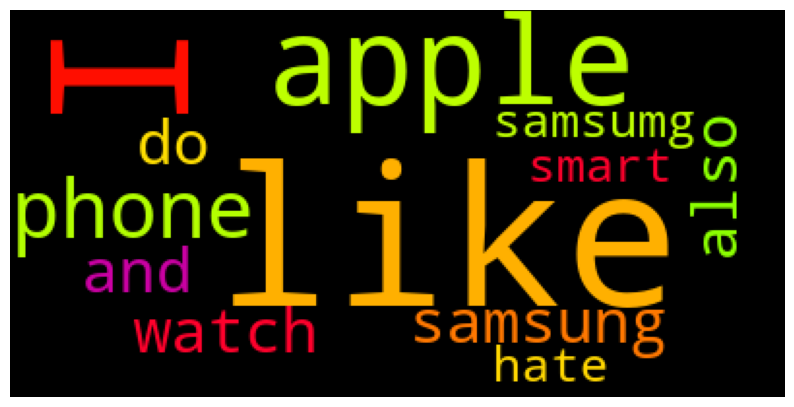

In [18]:
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(word_cloud)
plt.show()

In [22]:
image = Image.open('./data/heart.jpg')
mask = np.array(image)

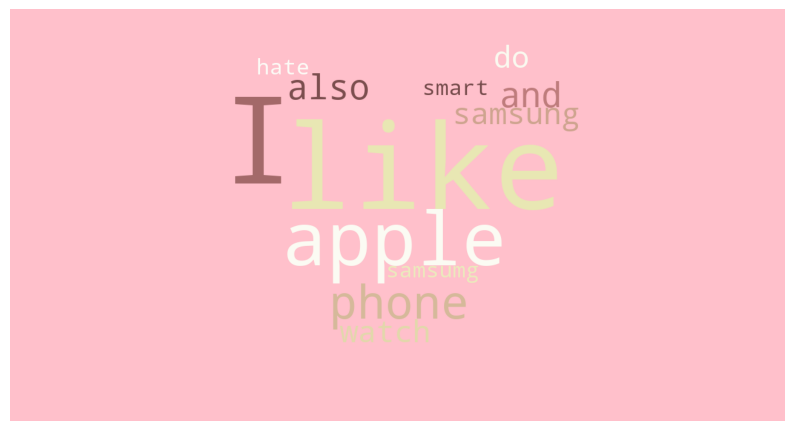

In [24]:
image = Image.open('./data/heart.jpg')
mask = np.array(image)

word_cloud = WordCloud(
    width=400,
    height=400,
    colormap = 'pink',
    max_font_size=200,
    mask = mask,
    background_color = 'pink'
).generate_from_frequencies(words)

plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(word_cloud)
plt.show()

### 5.2.2 TF-IDF
TF-IDF는 단어 빈도와 역 문서 빈도를 사용하여 문서 단어 행렬(DTM) 내의 각 단어 

#### 문서 단어 행렬 (Document-Term Matrix, DTM)
다수의 문서에 등장하는 각 단어들의 빈도를 행렬로 표현한 것

문서1: I like apple and also like samsung<br>
문서2: I like apple watch <br>
문서3: I do like samsumg smart phone <br>
문서4: I hate phone <br>
<br>

|문서|I|like|do|hate|apple|watch|samsung|smart|phone|and|also
|-|-|-|-|-|-|-|-|-|-|-|-|
|문서1|1|2|0|0|1|0|1|0|0|1|1|
|문서2|1|1|0|0|1|1|0|0|0|0|0|
|문서3|1|1|1|0|0|0|1|1|1|0|0|
|문서4|1|0|0|1|0|0|0|0|1|0|0|

<br>

위의 방법으로 행렬 구성 시, 단어가 column이 되는데, 등장하는 단어가 많을수록, 대부분의 벡터가 0을 가지게 됨 <br>

이를 **희소 벡터, 행렬**이라 부름 <br>

이는 많은 저장 공간과 높은 계산 비용을 필요로 하기에, 전처리를 통하여 크기를 줄이는 작업이 중요 <br>


#### Term Fequency (TF)
tf(d, t): 특정 문서 d에서 단어 t의 등장 횟수 <br>
<br>

> ex)
tf(1, 'like') = 2

```python
def term_frequency(term, document):
  return document.count(term)
```

```python
import itertools
import pandas as pd

documents = ['I like apple and also like samsung', 'I like apple watch', 'I do like samsumg smart phone', 'I hate phone']
vocab = list(set(word for document in documents for word in document.split()))
tf = []

for i in range(len(documents)):
  tf.append([])
  document = documents[i]
  for j in range(len(vocab)):
    term = vocab[j]
    tf[-1].append(term_frequency(term, document))

tf = pd.DataFrame(tf, columns=vocab)
```

In [114]:
documents = ['I like apple and also like samsung', 'I like apple watch', 'I do like samsumg smart phone', 'I hate phone']

In [115]:
documents

['I like apple and also like samsung',
 'I like apple watch',
 'I do like samsumg smart phone',
 'I hate phone']

In [123]:
vocab = tuple(set(re.split(' ', ' '.join(documents))))

In [127]:
def term_frequency(term,document):
    return document.count(term)

In [122]:
vocab

{'I',
 'also',
 'and',
 'apple',
 'do',
 'hate',
 'like',
 'phone',
 'samsumg',
 'samsung',
 'smart',
 'watch'}

In [125]:
import pandas as pd

In [132]:
tf = []
for document in documents:
    current_term_frequency = []
    for term in vocab:
        current_term_frequency.append(term_frequency(term,document))
    tf.append(current_term_frequency)

tf = pd.DataFrame(tf,columns = vocab)

In [133]:
tf

,samsung,watch,like,and,smart,apple,I,hate,phone,also,do,samsumg
0,1,0,2,1,0,1,1,0,0,1,0,0
1,0,1,1,0,0,1,1,0,0,0,0,0
2,0,0,1,0,1,0,1,0,1,0,1,1
3,0,0,0,0,0,0,1,1,1,0,0,0


#### IDF
df(d, t) = $log(\frac{n}{1+df(t)})$: 특정 단어 t가 등장한 문서의 수 <br>
<br>

> ex) idf

```python
def inverse_document_frequency(term, documents):
  N = len(documents)
  document_frequency = 0

  for document in documents:
    if term in document.split():
      document_frequency += 1
  
  return np.log(N/(document_frequency+1))
```

```python
import pandas as pd
import itertools

documents = ['I like apple and also like samsung', 'I like apple watch', 'I do like samsumg smart phone', 'I hate phone']
vocab = list(set(word for document in documents for word in document.split()))
idf = []

result = []
for i in range(len(vocab)):
    term = vocab[i]
    result.append(inverse_document_frequency(term, documents))

idf = pd.DataFrame(result, index=vocab, columns=["IDF"])
```

In [139]:
def inverse_document_frequency(term,documents):
    N = len(documents)
    document_frequency = 0

    for document in documents:
        if term in document.split():
            document_frequency += 1

    return np.log(N / (document_frequency + 1))

In [141]:
result = []
for term in vocab:
    result.append(inverse_document_frequency(term,documents))

idf = pd.DataFrame(result, index=vocab,columns=['idf'])
idf

,idf
samsung,0.693147
watch,0.693147
like,0.000000
and,0.693147
smart,0.693147
apple,0.287682
I,-0.223144
hate,0.693147
phone,0.287682
also,0.693147


#### TF-IDF
단어의 빈도와 역 문서 빈도의 곱 <br>
단어의 중요도를 가중치로 주는 방법 <br>

```python
def tf_idf(term, document, documents):
  return term_frequency(term, document) * inverse_document_frequency(term, documents)
```
```python
import pandas as pd
import itertools

documents = ['I like apple and also like samsung', 'I like apple watch', 'I do like samsumg smart phone', 'I hate phone']
vocab = list(set(word for document in documents for word in document.split()))
tf_idf_result = []

for i in range(len(documents)):
  tf_idf_result.append([])
  document = documents[i]
  for j in range(len(vocab)):
    term = vocab[j]
    tf_idf_result[-1].append(tf_idf(term, document, documents))

tfidf_ = pd.DataFrame(tf_idf_result, columns=vocab)
tfidf_
```

In [144]:
def tf_idf(term,document, documents):
    return term_frequency(term,document) * inverse_document_frequency(term,documents)

In [145]:
tf_idf_result = []
for document in documents:
    current_tf_idf=[]
    for term in vocab:
        current_tf_idf.append(tf_idf(term, document, documents))
    tf_idf_result.append(current_tf_idf)

tfidf = pd.DataFrame(tf_idf_result, columns = vocab)
tfidf

,samsung,watch,like,and,smart,apple,I,hate,phone,also,do,samsumg
0,0.693147,0.000000,0.0,0.693147,0.000000,0.287682,-0.223144,0.000000,0.000000,0.693147,0.000000,0.000000
1,0.000000,0.693147,0.0,0.000000,0.000000,0.287682,-0.223144,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.0,0.000000,0.693147,0.000000,-0.223144,0.000000,0.287682,0.000000,0.693147,0.693147
3,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,-0.223144,0.693147,0.287682,0.000000,0.000000,0.000000


In [146]:
from sklearn.feature_extraction.text import CountVectorizer

In [148]:
vector = CountVectorizer()
X = vector.fit_transform(documents)
X.toarray()

array([[1, 1, 1, 0, 0, 2, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0],
       [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0]], dtype=int64)

#### CountVectorizer

```python
from sklearn.feature_extraction.text import CountVectorizer

documents=['I like apple and also like samsung', 'I like apple watch', 'I do like samsumg smart phone', 'I hate phone']

vector = CountVectorizer()
vector.fit_transform(documents).toarray()   # tf
vector.vocabulary_                      # word count
```

#### TfidfVectorizer

```python
from sklearn.feature_extraction.text import TfidfVectorizer

documents=['I like apple and also like samsung', 'I like apple watch', 'I do like samsumg smart phone', 'I hate phone']

vector = TfidfVectorizer().fit(documents)
vector.fit_transform(documents).toarray()   # tf
vector.vocabulary_                          # word count
```

In [149]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [151]:
vector = TfidfVectorizer()
x = vector.fit_transform(documents)
x.toarray()

array([[0.43638449, 0.43638449, 0.34405055, 0.        , 0.        ,
        0.55707714, 0.        , 0.        , 0.43638449, 0.        ,
        0.        ],
       [0.        , 0.        , 0.55349232, 0.        , 0.        ,
        0.44809973, 0.        , 0.        , 0.        , 0.        ,
        0.70203482],
       [0.        , 0.        , 0.        , 0.49819711, 0.        ,
        0.31799276, 0.39278432, 0.49819711, 0.        , 0.49819711,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.78528828,
        0.        , 0.6191303 , 0.        , 0.        , 0.        ,
        0.        ]])

### 5.2.3 Association Rule
항목 간 관계를 규칙 기반으로 분석하는 방법 <br>
마케팅 등에서 고객 상품 구매 데이터를 활용해 품목 간 연관성을 본다는 의미에서 장바구니 분석이라고도 불림 <br>

> example <br>
- 삼겹살, 소주 -> 삼겹살을 사는 고객은 소주도 같이 구매한다

```python
from apyori import apriori

```

### 분석 방법
거래 내역이 아래와 같이 주어져 있다고 가정

|번호|품목|
|-|-|
|1|삼겹살, 상추, 소주|
|2|삼겹살, 소주|
|3|삼겹살, 깻잎|
|4|닭고기, 비누|
|5|닭고기, 상추, 고추|

<br>
<br>

위의 거래 내역을 이용하여 다음의 구매 행렬을 만들 수 있음 <br>

||삼겹살|상추|소주|깻잎|닭고기|비누|고추|
|-|-|-|-|-|-|-|-|
|삼겹살|3|1|2|0|0|1|1|
|상추 |1|2|1|0|1|0|1|
|소주|2|1|2|0|0|0|0|
|깻잎|0|0|0|1|0|0|0|
|닭고기|0|1|0|0|2|1|1|
|비누|1|0|0|0|1|1|0|
|고추|1|1|0|0|1|0|1|

<br>
위의 규칙을 보면 삼겹살을 사는 고객은 소주를 산다는 것을 확인할 수 있음 <br>
그러나 이는 정성적이므로, 정량적 평가 지표를 도입하여 이러한 연관 규칙이 유효한지 판단 <br>

1. Confidence <br>
X가 포함하는 거래 내역 중 Y가 포함된 비율이 높아야 함 <br>
$P(소주|삼겹살) = \frac{\frac{2}{5}}{\frac{3}{5}} = \frac{2}{3} $

2. Support <br>
X와 Y를 동시에 포함하는 비율이 높아야 함 $P(X \cap Y)$ <br>
신뢰도 $P(삼겹살|소주) = \frac{\frac{1}{5}}{\frac{2}{5}} = \frac{1}{2} $이나 거래 건수가 5개 중 1개<br>
이는 아직 발생 횟수가 충분하지 않아 소주를 사면 삼겹살을 샀다라는 규칙을 지지하기 위해 실질적으로는 $P(X \cap Y)$가 높아야 함을 의미

3. Lift <br>
신뢰도가 만약 $P(Y|X)=0.8$이었고 이는 충분히 높은 수치라고 판단하여 X -> Y라는 규칙이 의미 있다고 판단 할 수 있을 것 <br>
하지만 Y가 발생한 비율이 0.8이었다고 하면 $P(Y|X) = P(Y)$가 되어 X는 Y를 설명하는데 아무런 도움이 되지 못함 <br>
따라서 P(Y|X)/P(Y)를 계산하는데 이를 향상도(Lift)라고 함 <br>
- Lift = 1: X와 Y는 독립
- Lift > 1: X가 Y 발생 확률을 X를 고려하지 않았을 때보다 증가시킴 (X가 Y 증가 예측에 도움을 줌)
- Lift < 1: X가 Y 발생 확률을 X를 고려하지 않았을 때보다 감소시킴 (X가 Y 감소 예측에 도움을 줌) 

<br>
<br>

```python
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

documents = ['I like apple and also like samsung', 'I like apple watch', 'I do like samsumg smart phone', 'I hate phone']
words = list(itertools.chain(*[document.split() for document in documents]))
items = [words[i:i+3] for i in range(len(words)-3)]

transaction_encoder = TransactionEncoder()
te_result = transaction_encoder.fit(items).transform(items)
data = pd.DataFrame(te_result, columns=np.unique(words))
itemset = apriori(data, min_support=0.5, use_colnames=True)
association_rules(itemset, metric='confidence', min_threshold=0.5)
```



## 5.3 영어 자료 분석

## 5.4 한국어 자료 전처리

In [25]:
!pip install kiwipiepy

     ------------------------------------- 685.6/685.6 kB 14.4 MB/s eta 0:00:00
     --------------------------------------- 30.5/30.5 MB 43.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for kiwipiepy-model: filename=kiwipiepy_model-0.14.0-py3-none-any.whl size=30560025 sha256=2f124c596daafe076815a8c53c47f7b544831133d6f127efc8f045139533f7ca
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\cd\10\8e\2d32ad6e25239a4edf2b1d862924c86e646eb3b0f677297320
Successfully built kiwipiepy-model


In [29]:
import pandas as pd
from kiwipiepy import Kiwi

In [30]:
kiwi = Kiwi()

In [61]:
video_info = pd.read_csv('./data/video_info.csv')
comments = pd.read_csv('./data/comments.csv')
comments = video_info.merge(comments, on = 'video_id')

In [66]:
soojung = comments.query( 'video_id == "JPaubSOSxeM"')

In [67]:
soojung['refined_comments'] = soojung.comments.apply(lambda x: re.sub('[ㄱ-ㅎ ㅏ-ㅣ^!.,]',' ', x))

C:\Users\user\AppData\Local\Temp\ipykernel_1224\4025591877.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  soojung['refined_comments'] = soojung.comments.apply(lambda x: re.sub('[ㄱ-ㅎ ㅏ-ㅣ^!.,]',' ', x))


In [68]:
soojung['refined_comments'] = soojung.refined_comments.apply(lambda x: re.sub(' +', ' ',x))

C:\Users\user\AppData\Local\Temp\ipykernel_1224\1965325170.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  soojung['refined_comments'] = soojung.refined_comments.apply(lambda x: re.sub(' +', ' ',x))


In [69]:
soojung

,video_id,title,comments,refined_comments
0,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,와 ㅋㅋㅋ ㄹㅇ 숨막힌다 ㅋㅋㅋ,와 숨막힌다
1,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,아빠가 세뇌 당함..... ㅋㅋㅋㅋㅋㅋㅋ,아빠가 세뇌 당함
2,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,아 존나 웃기닼ㅋㅋㅋㅋㅋㅋㅋ,아 존나 웃기닼
3,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,여자들아 남자 믿지 말고 외박하지마라..,여자들아 남자 믿지 말고 외박하지마라
4,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,"이건 사랑이 아니다. 애비를 죽여라,",이건 사랑이 아니다 애비를 죽여라
...,...,...,...,...
3848,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,오우,오우
3849,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,1등 ^^,1등
3850,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,와!,와
3851,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,재밌네요,재밌네요


In [70]:
token = kiwi.analyze(soojung.refined_comments[4])[0][0][0]

In [ ]:
[token.form
 for token
 in kiwi.analyze(soojung.refined_comments[4])[0][0]
 if token.tag.startswith('N')]

In [106]:
def extract_noun_from_kiwi_analyzed(comment):
    try:
        kiwi_analyzed_comment = kiwi.analyze(comment)
    except ValueError:
        return []
    
    return[
        token.form
        for token
        in kiwi_analyzed_comment[0][0]
        if token.tag.startswith('N') and token.len > 1
    ]

In [111]:
soojung['words'] = soojung.refined_comments.apply(lambda x: extract_noun_from_kiwi_analyzed(x))

C:\Users\user\AppData\Local\Temp\ipykernel_1224\2561687788.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  soojung['words'] = soojung.refined_comments.apply(lambda x: extract_noun_from_kiwi_analyzed(x))


In [108]:
soojung

,video_id,title,comments,refined_comments,words
0,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,와 ㅋㅋㅋ ㄹㅇ 숨막힌다 ㅋㅋㅋ,와 숨막힌다,[]
1,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,아빠가 세뇌 당함..... ㅋㅋㅋㅋㅋㅋㅋ,아빠가 세뇌 당함,"[아빠, 세뇌]"
2,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,아 존나 웃기닼ㅋㅋㅋㅋㅋㅋㅋ,아 존나 웃기닼,[웃기닼]
3,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,여자들아 남자 믿지 말고 외박하지마라..,여자들아 남자 믿지 말고 외박하지마라,"[여자, 남자, 외박]"
4,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,"이건 사랑이 아니다. 애비를 죽여라,",이건 사랑이 아니다 애비를 죽여라,"[이거, 사랑, 애비]"
...,...,...,...,...,...
3848,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,오우,오우,[]
3849,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,1등 ^^,1등,[]
3850,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,와!,와,[]
3851,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,재밌네요,재밌네요,[]


In [109]:
soojung_word_count = Counter(itertools.chain(*soojung.words))

In [110]:
soojung.words = soojung.words.apply(lambda x: extract_noun_from_kiwi_analyzed(x))

TypeError: 'kiwipiepy._ResIter' object is not subscriptable

In [112]:
image = Image.open('./data/heart.jpg')
mask = np.array(image)

word_cloud = WordCloud(
    font_path = 'malgun',
    width=400,
    height=400,
    colormap = 'pink',
    max_font_size=200,
    mask = mask,
    background_color = 'pink'
).generate_from_frequencies(soojung_word_count)

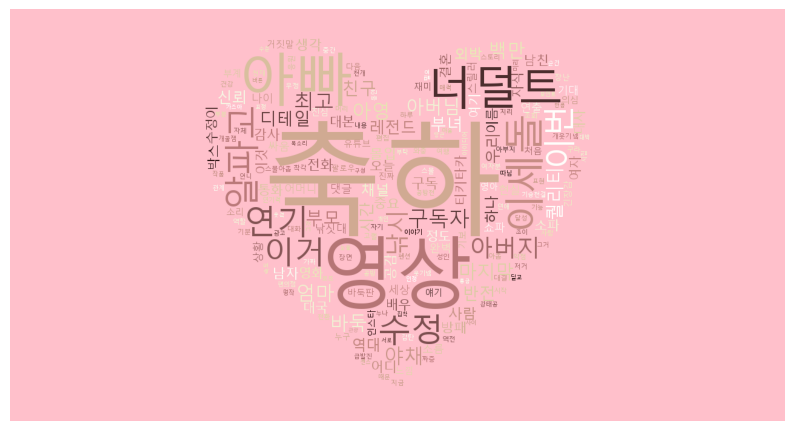

In [113]:
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(word_cloud)
plt.show()

In [154]:
soojung['word_features'] = soojung.words.apply(lambda x: ' '.join(x))

C:\Users\user\AppData\Local\Temp\ipykernel_1224\3290340477.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  soojung['word_features'] = soojung.words.apply(lambda x: ' '.join(x))


In [156]:
soojung.filter(items=['comments','word_features'])

,comments,word_features
0,와 ㅋㅋㅋ ㄹㅇ 숨막힌다 ㅋㅋㅋ,
1,아빠가 세뇌 당함..... ㅋㅋㅋㅋㅋㅋㅋ,아빠 세뇌
2,아 존나 웃기닼ㅋㅋㅋㅋㅋㅋㅋ,웃기닼
3,여자들아 남자 믿지 말고 외박하지마라..,여자 남자 외박
4,"이건 사랑이 아니다. 애비를 죽여라,",이거 사랑 애비
...,...,...
3848,오우,
3849,1등 ^^,
3850,와!,
3851,재밌네요,


In [161]:
documents = [word_feature for word_feature in soojung.word_features if word_feature != ""]

In [162]:
tfidf_soojung = TfidfVectorizer().fit_transform(documents)

In [163]:
tfidf_soojung.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [165]:
from sklearn.metrics.pairwise import cosine_similarity

In [166]:
cos_sim = cosine_similarity(tfidf_soojung.toarray())

In [173]:
sim_index = np.where((0.9 <= cos_sim) & (cos_sim < 1))

In [175]:
sim_index[0][0], sim_index[1][0]

(22, 2889)

In [176]:
documents[22]

'사람 사람'

In [177]:
documents[2889]

'너덜트 사람 사람'